# 検定と信頼区間: 比率の検定と信頼区間

* 黒木玄
* 2022-05-31～2022-06-07

$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
\newcommand\CP{{\mathrm{CP}}}
\newcommand\Sterne{{\mathrm{Stern}}}
\newcommand\Wilson{{\mathrm{Wilson}}}
\newcommand\Wald{{\mathrm{Wald}}}
\newcommand\LLR{{\mathrm{LLR}}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\cdf{\op{cdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Normal{\op{Normal}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\phat{\hat{p}}
\newcommand\SE{\op{SE}}
\newcommand\SEhat{\widehat{\SE}}
$


このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#比率の検定と信頼区間" data-toc-modified-id="比率の検定と信頼区間-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>比率の検定と信頼区間</a></span></li><li><span><a href="#P値と信頼区間の定義の復習" data-toc-modified-id="P値と信頼区間の定義の復習-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>P値と信頼区間の定義の復習</a></span></li><li><span><a href="#Clopper-Pearson" data-toc-modified-id="Clopper-Pearson-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clopper-Pearson</a></span><ul class="toc-item"><li><span><a href="#Clopper-Pearsonの信頼区間を与えるP値関数" data-toc-modified-id="Clopper-Pearsonの信頼区間を与えるP値関数-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Clopper-Pearsonの信頼区間を与えるP値関数</a></span></li><li><span><a href="#Clopper-Pearsonの信頼区間" data-toc-modified-id="Clopper-Pearsonの信頼区間-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Clopper-Pearsonの信頼区間</a></span></li><li><span><a href="#問題:-Clopper-Pearsonの信頼区間の導出" data-toc-modified-id="問題:-Clopper-Pearsonの信頼区間の導出-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>問題: Clopper-Pearsonの信頼区間の導出</a></span></li></ul></li><li><span><a href="#Sterne" data-toc-modified-id="Sterne-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sterne</a></span><ul class="toc-item"><li><span><a href="#Sterneの信頼区間を与えるP値関数" data-toc-modified-id="Sterneの信頼区間を与えるP値関数-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sterneの信頼区間を与えるP値関数</a></span></li><li><span><a href="#Sterneの信頼区間" data-toc-modified-id="Sterneの信頼区間-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Sterneの信頼区間</a></span></li></ul></li><li><span><a href="#Wilson" data-toc-modified-id="Wilson-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Wilson</a></span><ul class="toc-item"><li><span><a href="#Wilsonの信頼区間を与えるP値函数" data-toc-modified-id="Wilsonの信頼区間を与えるP値函数-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Wilsonの信頼区間を与えるP値函数</a></span></li><li><span><a href="#Pearsonのχ²検定との関係" data-toc-modified-id="Pearsonのχ²検定との関係-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Pearsonのχ²検定との関係</a></span></li><li><span><a href="#Wilsonの信頼区間" data-toc-modified-id="Wilsonの信頼区間-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Wilsonの信頼区間</a></span></li><li><span><a href="#Wilsonの信頼区間の導出" data-toc-modified-id="Wilsonの信頼区間の導出-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Wilsonの信頼区間の導出</a></span></li></ul></li><li><span><a href="#Wald" data-toc-modified-id="Wald-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Wald</a></span><ul class="toc-item"><li><span><a href="#Waldの信頼区間を与えるP値関数" data-toc-modified-id="Waldの信頼区間を与えるP値関数-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Waldの信頼区間を与えるP値関数</a></span></li><li><span><a href="#Waldの信頼区間" data-toc-modified-id="Waldの信頼区間-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Waldの信頼区間</a></span></li><li><span><a href="#問題:-Waldの信頼区間の導出" data-toc-modified-id="問題:-Waldの信頼区間の導出-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>問題: Waldの信頼区間の導出</a></span></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using BenchmarkTools
using Distributions
using LinearAlgebra
using Printf
using QuadGK
using RCall
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " * sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " * sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&") for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : x*y
safediv(x, y) = x == 0 ? x : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

## 比率の検定と信頼区間

以下のようなことを行いたい.

(1) 当たりが未知の確率で出るルーレットを $n$ 回まわしたときに, $k$ 回当たりが出たというデータから, ルーレットで当たりが出る確率を推定する.

(2) 壺の中に赤い玉と白い玉が大量に入っているとき, そこから $n$ 個を無作為抽出したときに $k$ 個が赤い玉であったというデータから, 壺の赤い玉の割合を推定する.

このような推定を以下では __比率の推定__ と呼ぶことにする.

ルーレットでの当たりの確率や壺の中の赤い玉の割合を総称して __比率__ (proportion) と呼んでいる.

目標は比率の信頼区間の構成である.

そのためには, 検定と信頼区間の表裏一体性より, P値を適切に定義すればよい.

以下では, ルーレットで当たりが出たり, 壺から赤い玉が出ることを __成功__ と呼ぶことにする.

__注意:__ 現実世界の統計分析では「成功」は「死亡」を意味する場合もあって, 良いことばかりとは限らない.

## P値と信頼区間の定義の復習

比率の二項分布モデルでの取り扱いを例にP値と信頼区間の定義を復習しよう.

__データ:__　$n$ 回中 $k$ 回成功

__統計モデル:__　統計モデルとして二項分布を使用する:

$$
P(k|n,p) = \binom{n}{k} p^k (1-p)^{n-k} \quad (k=0,1,2,\ldots,n)
$$

二項分布の累積分布函数を次のように書く:

$$
\cdf(\Binomial(n,p), k) = \sum_{i\le k} P(j|n,p).
$$

他の分布の累積分布函数も同様に書くことにする.

__検定される仮説:__　$p = p_0$ $\quad$ ($p_0$ は具体的な数値)

__P値の大雑把な定義:__　仮説 $p = p_0$ 下の統計モデル内でデータの数値「$n$ 回中 $k$ 回成功」以上に極端な値が生じる確率またはその近似値.

「データの数値以上に極端な」の正確な定義や近似の仕方については別に与えることになる.

__P値の使い方:__ データの数値「$n$ 回中 $k$ 回成功」に関する仮説 $p=p_0$ のP値は, 仮説 $p=p_0$ 下の __統計モデルとデータの数値の整合性__ の指標として使われる.

以下ではP値を次のように書く:

$$
\pvalue(k|n,p=p_0) =
(\text{データ「$n$ 回中 $k$ 回成功」に関する仮説 $p=p_0$ のP値}).
$$

__有意水準:__　$0\le \alpha \le 1$　($5\%$ や $1\%$ など小さな値にする).

__検定:__　P値が有意水準未満ならば仮説 $p=p_0$ は __棄却__ されたという.

ただし, これは閾値 $\alpha$ に基いて, 単に仮説 $p=p_0$ 下の統計モデルとデータの数値の整合性が低過ぎると判断することを超えた意味を持たないことには注意しなければいけない.

データの取得法に問題があった可能性や仮説 $p=p_0$ も含めた統計モデルの前提のどれかが妥当でない可能性を疑うことになる.

仮説 $p=p_0$ が棄却されない場合にはその妥当性に関する判断を保留する.

__信頼度:__　$1 - \alpha$.

__信頼区間:__　検定で棄却されない成功確率パラメータ $p=p_0$ の全体の集合.

以下では信頼区間(confidence interval)を次のように書く:

$$
\confint(k|n,\alpha) = \{\,p_0 \in [0,1]\mid \pvalue(k|n,p=p_0) \ge \alpha\,\}.
$$

__信頼区間の使い方:__ 信頼区間に含まれるパラメータ値 $p=p_0$ についてはその妥当性についての判断は保留する.  信頼区間に含まれないパラメータ値 $p=p_0$ については, 仮説 $p=p_0$ が検定によって棄却されたと考える. (注意: 実際には統計モデルのすべての前提が疑われることになる.)

## Clopper-Pearson

### Clopper-Pearsonの信頼区間を与えるP値関数

データ「$n$ 回中 $k$ 回成功」について, 「データの数値以上に極端な」の意味を「$k$ 以上の」または「$k$ 以下の」の確率の小さい方とした場合.  ただし, P値はその確率の2倍として定義する($1$ を超えないように $1$ より大きくなったら $1$ に切り詰める):

$$
\pvalue_\CP(x|n, p=p_0) = \min\begin{pmatrix}
1 \\
2\cdf(\Binomial(n,p_0), k) \\
2(1 - \cdf(\Binomial(n,p_0), k-1)) \\
\end{pmatrix}
$$

$\cdf(\Binomial(n,p_0), k)$ は二項分布の累積分布函数なので, 二項分布 $\Binomial(n,p_0)$ 内で $k$ 以下になる確率であり, $1 - \cdf(\Binomial(n,p_0), k-1)$ は $k$ 以上になる確率である.

### Clopper-Pearsonの信頼区間

$p_L, p_U$ は次の条件で定義する:

$$
\begin{aligned}
&
1 - \cdf(\Binomial(n, p_L), k-1) = \alpha/2,
\\ &
\cdf(\Binomial(n, p_U), k) = \alpha/2.
\end{aligned}
$$

前節でのP値の定義は次のClopper-Pearsonの信頼区間を与える:

$$
\confint_\CP(k|n,\alpha) = [p_L, p_U].
$$

__実際の計算の方法:__ 二項分布とベータ分布の関係

$$
\begin{aligned}
&
1 - \cdf(\Binomial(n, p), k-1) = \cdf(\Beta(k, n-k+1), p),
\\ &
\cdf(\Binomial(n, p), k) = 1 - \cdf(\Beta(k+1, n-k), p)
\end{aligned}
$$

と分位点函数 $\quantile$ が累積分布函数 $\cdf$ の逆函数であることより, 

$$
\begin{aligned}
&
p_L = \quantile(\Beta(k, n-k+1), \alpha/2),
\\ &
p_U = \quantile(\Beta(k+1, n-k), 1-\alpha/2).
\end{aligned}
$$

によって, $p_L, p_U$ を計算可能である.

### 問題: Clopper-Pearsonの信頼区間の導出

P値の定義 $\pvalue_\CP(k|n,p=p_0)$ に対応する信頼区間が実際に前節で記述した $\confint_CP(k|n,\alpha)$ になることを示せ.

__ヒント:__ 「例：ベータ函数と二項分布の関係とその応用」のノートの「Clopper-Pearsonの信頼区間の定義」の節を参照せよ.

__解答例:__

__解答終__

## Sterne

### Sterneの信頼区間を与えるP値関数

「データの数値以上に極端な」の意味を「生成される確率がデータの数値以下の」とした場合:

$$
\pvalue_\Sterne(k|n,p=p_0) =
\sum_{\text{$j$ satisfying $P(j|n,p_0)\le P(k|n,p_0)$}} P(j|n,p_0).
$$

これは, モデル内での生成確率 $P(j|n,p_0)$ がデータの数値と同じ値の生成確率 $P(k|n,p_0)$ 以下になる $j$ について確率 $P(j|n,p_0)$ を足し上げたものである.

__注意:__ Clopper-Pearsonの信頼区間を与えるP値もSterneの信頼区間を与えるP値も第一種の過誤の確率が常に有意水準以下になるという意味で保守的(conservative)なP値の定義になっている.  そして, Sterneの信頼区間を与えるP値の方が小さな値になることが多いということも知られている. この基準ではSterneの信頼区間を与えるP値に方がClopper-Pearsonの信頼区間を与えるP値よりも優れていると言える.  しかし, Sterneの信頼区間を与えるP値の効率的実装はClopper-Pearsonの信頼区間を与えるP値の実装よりもずっと複雑になってしまう.

### Sterneの信頼区間

上で定義したP値の定義はSterneの信頼区間([Sterne (1954)](https://www.jstor.org/stable/2333026))を与える:

$$
\confint_\Sterne(k|n,\alpha) =
\{\,p_0 \in [0,1]\mid \pvalue_\Sterne(k|n,p=p_0) \ge \alpha\,\}.
$$

Sterneの信頼区間は被覆確率(coverage probability)や長さの期待値(expected length)の基準から, Clopper-Pearsonの信頼区間よりも優れていることが知られている.

しかし, 効率的な計算の実装はずっと複雑になり, Sterneの信頼区間の計算のためにはコンピュータの取り扱いに習熟する必要がある.  このノートでは読者にそこまで要求するつもりはない. しかし, プログラミングに自信がある人達はSterneの信頼区間の実装を自力で試してみると大変良い勉強になると思われる.

__注意:__ このタイプの信頼区間は稀に区間にならない場合がある. そのような稀な場合にも区間にすることにこだわるならば, P値が $\alpha$ 以上になる $p=p_0$ 全体の集合を含む最小の区間を改めて信頼区間の定義とするというような処置が必要になる. その場合には以下のようになる:

$$
\confint_\Sterne(k|n,\alpha) = [p_\inf, p_\sup].
$$

ここで,

$$
\begin{aligned}
p_\inf &= \inf
\{\,p_0 \in [0,1]\mid \pvalue_\Sterne(k|n,p=p_0) \ge \alpha\,\},
\\
p_\sup &= \sup
\{\,p_0 \in [0,1]\mid \pvalue_\Sterne(k|n,p=p_0) \ge \alpha\,\}.
\end{aligned}
$$

__注意:__ Sterneの信頼区間とClopper-Pearsonの信頼区間などの比較については例えば以下の報告がある:

* 原茂恵美子, 武藤彬正, 宮島育哉, 榊原伊織, SASによる二項比率における正確な信頼区間の比較, 2014. \[[pdf](https://www.sas.com/content/dam/SAS/ja_jp/doc/event/sas-user-groups/usergroups14-d-05.pdf)\]

__注意:__ R言語の `binom.test` がデフォルトで表示するP値はSterneの信頼区間を与えるP値であるが, それと同時に表示される信頼区間はClopper-Pearsonの信頼区間の方になってしまっている.  そのせいで, P値が有意水準未満なのに, 帰無仮説を与える成功確率パラメータ値が信頼区間に含まれてしまう場合がある.

In [15]:
R"binom.test(10, 20, p=0.72, conf.level=0.95)"

RObject{VecSxp}

	Exact binomial test

data:  10 and 20
number of successes = 10, number of trials = 20, p-value = 0.04277
alternative hypothesis: true probability of success is not equal to 0.72
95 percent confidence interval:
 0.2719578 0.7280422
sample estimates:
probability of success 
                   0.5 



上のRの`binom.test`の結果と以下を比較してみよ.

In [5]:
α = 0.05
n, k = 20, 10
null = Binomial(n, 0.72)

Binomial{Float64}(n=20, p=0.72)

In [6]:
# Sterneの信頼区間を与えるP値を定義通りに計算(計算効率はよくない)
p_value_sterne =
    sum(pdf(null, i) for i in 0:n if pdf(null, i) ⪅ pdf(null, k))
@show p_value_sterne;

p_value_sterne = 0.04276902774675169


In [7]:
# p を pvalue_sterne - α に対応させる函数が
# 0 になる 0 から 1 のあいだの p 達を求めれば,
# Sterneの信頼区間を計算できる.
conf_int_sterne = find_zeros(0, 1) do p
    null = Binomial(n, p)
    pvalue_sterne =
        sum(pdf(null, i) for i in 0:n if pdf(null, i) ⪅ pdf(null, k))
    pvalue_sterne - α
end
@show conf_int_sterne;

conf_int_sterne = [0.2927095227968867, 0.7072904772031132]


[`f(a, b) do ... end` 構文の解説](https://docs.julialang.org/en/v1/manual/functions/#Do-Block-Syntax-for-Function-Arguments)

In [8]:
# Clopper-Pearsonの信頼区間を与えるP値を定義通りに計算
p_value_clopper_pearson = min(1, 2cdf(null, k), 2(1-cdf(null, k-1)))
@show p_value_clopper_pearson;

p_value_clopper_pearson = 0.06093072477502701


In [9]:
# Clopper-Pearsonの信頼区間をベータ分布を使って計算
conf_int_clopper_pearson =
    [quantile(Beta(k, n-k+1), α/2), quantile(Beta(k+1, n-k), 1-α/2)]
@show conf_int_clopper_pearson;

conf_int_clopper_pearson = [0.27195784956079183, 0.7280421504392082]


有意水準が $\alpha = 5\%$ で, 「$20$ 回中 $10$ 回成功」というデータが得られたときに, 仮説「成功確率は $p=0.72$ である」のP値と成功確率 $p$ の信頼区間は以下の表のようになる:

$$
\begin{array}{|c|c|c|}
\hline
\text{計算法} & \text{仮説 $p=0.72$ のP値} & \text{信頼区間} \\ 
\hline
\text{Sterne} & 4.277\% < \alpha = 5\% & [0.2927095, 0.7072905] \\
\hline
\text{Clopper-Pearson} & 6.093\% > \alpha = 5\% & [0.2719578, 0.7280422] \\
\hline
\end{array}
$$

このようにP値と信頼区間の表裏一体性に忠実であれば, P値が有意水準未満であることと, 信頼区間に帰無仮説を与えるパラメータ値が含まれないことが同値になる.  しかし, R言語の `binom.test` は信頼区間の表裏一体正を無視しているので, 整合性がない結果が稀に表示されることがあるので注意が必要である.

## Wilson

### Wilsonの信頼区間を与えるP値函数

データ「$n$ 回中 $k$ 回成功」について, 「データの数値以上に極端な」の意味を二項分布の正規分布近似のもとで「$k$ 以上または $k$ 以下の」とした場合:

$$
\pvalue_\Wilson(k|n,p=p_0) = 
2\left(1 - \cdf\left(\Normal(0,1), \frac{|k - np_0|}{\sqrt{np_0(1-p_0)}}\right)\right).
$$

右辺は標準正規分布において, 絶対値が $|k-np_0|/\sqrt{np_0(1-p_0)}$ 以上になる確率である.

標準正規分布に従う確率変数の2乗は自由度 $1$ のχ²分布に従うことを使えば, これは次のように表される:

$$
\pvalue_\Wilson(k|n,p=p_0) = 
1 - \cdf\left(\Chisq(1), \frac{(k - np_0)^2}{np_0(1-p_0)}\right).
$$

### Pearsonのχ²検定との関係

上のP値を, スコア統計量(score statistics)に基くP値と呼んだり, Pearsonのχ²統計量

$$
\frac{(k - np_0)^2}{np_0(1-p_0)} =
\frac{(k - np_0)^2}{np_0} +
\frac{((n-k) - n(1-p_0))^2}{n(1-p_0)}
$$

に基くP値と呼んだりする. 一般にPearsonのχ²統計量は

$$
(\text{Pearsonのχ²統計量}) = \sum \frac
{(\text{観測値} - \text{帰無仮説下の統計モデル内での期待値})^2}
{\text{帰無仮説下の統計モデル内での期待値}}
$$

のスタイルで定義される.  上の場合には, 観測値が成功回数 $k$ と失敗回数 $n-k$ であり, 対応する帰無仮説下の統計モデル内での期待値はそれぞれ $np_0$, $n(1-p_0)$ である.

__注意:__ Pearsonのχ²統計量は多項分布モデルでの検定や分割表の独立性検定でも大活躍することになる.

__注意:__ Pearsonのχ²統計量は多項分布モデルでも利用できる. 例えば, 検定したい仮説「A, B, Cが生じる確率はそれぞれ $p_{A,0}, p_{B,0}, p_{C,0}$ である」($p_{A,0}+p_{B,0}+p_{C,0} = 1$)のとき, 「$n$ 回中 A, B, C がそれぞれ $a, b, c$ 回生じた」というデータに対して, Pearsonのχ²統計量を

$$
(\text{Pearsonのχ²統計量}) =
\frac{(a - np_{A,0})^2}{np_{A,0}} +
\frac{(b - np_{B,0})^2}{np_{B,0}} +
\frac{(c - np_{C,0})^2}{np_{C,0}}
$$

で定義できる.  二項分布の中心極限定理の拡張になっている多項分布の中心極限定理によって, このPearsonのχ²統計量は上の仮説下の多項分布内で自由度 $2$ のχ²分布に近似的に従うことを示せる.

このことを使えば上と同様の方法で多項分布モデルの場合にもP値を定義できる.  例えば, 出目に偏りがあることが疑われているサイコロを $n$ 回ふったら $i=1,2,\ldots,6$ の目が $a_i$ 回出たとき, 仮説「すべての目が等確率で出る」に関するPearsonのχ²統計量は

$$
(\text{Pearsonのχ²統計量}) = \sum_{i=1}^6 \frac{(a_i - n/6)^2}{n/6}
$$

になる. その仮説下の多項分布内でこれは, $n$ が大きいければ, 自由度 $5$ のχ²分布に近似的に従う.

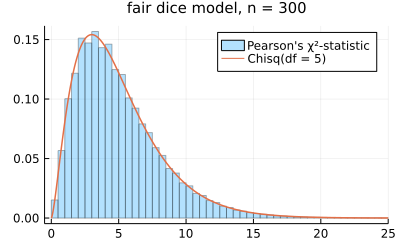

In [10]:
n, p = 300, [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
null = Multinomial(n, p) # fair dice model
df = ncategories(null) - 1 # degree of freedom

chisq_stat(a, n, p) = sum((a - n*p)^2/(n*p) for (a, p) in zip(a, p))
tmp = zeros(ncategories(null))
chisqs = [chisq_stat(rand!(null, tmp), n, p) for _ in 1:10^6]

histogram(chisqs; norm=true, alpha=0.3, bin=100,
    label="Pearson's χ²-statistic")
plot!(Chisq(df); label="Chisq(df = $df)", lw=1.5)
title!("fair dice model, n = $n")
plot!(; xlim=(-0.5, 25))

### Wilsonの信頼区間

以下で使う記号を準備しよう. $\phat, \SEhat, \SE$ を以下のように定義する:

$$
\phat = \frac{k}{n}, \quad
\SEhat = \sqrt{\frac{\phat(1 - \phat)}{n}}, \quad
\SE = \sqrt{\frac{p_0(1 - p_0)}{n}}.
$$

ハットが付いている記号はデータの数値から計算した推定値であり, $\SE$ は標準誤差(standard error)の略である.

次が成立していることにも注意せよ(分子分布を $n$ で割る):

$$
\frac{k - np_0}{\sqrt{np_0(1-p_0)}} =
\frac{\phat - p_0}{\SE}.
$$

これに対応する統計モデル内の確率変数は近似的に標準正規分布に従うのであった.

この場合の信頼区間は以下のように記述される.

まず, $z_{\alpha/2}$ を次のように定める:

$$
z_{\alpha/2} = \op{quantile}(\op{Normal(0, 1)}, 1 - \alpha/2).
$$

これは標準正規分布において $z_{\alpha/2}$ 以上になる確率が $\alpha/2$ になるという意味である.

次に, $a,b,c$ を

$$
a = 1 + \frac{z^2}{n}, \quad
b = \phat + \frac{z^2}{2n}, \quad
c = \phat^2
$$

と定義し, 次の $p$ に関する二次方程式を考える:

$$
ap^2-2bp+c=0.
$$

そして, この二次方程式の2つの解を $p_- \le p_+$ と書く: $z=z_{\alpha/2}$ とおくと, 

$$
p_\pm = \frac{b \pm \sqrt{b^2-ac}}{a} =
\frac{1}{1+z^2/n}\left(
\phat+\frac{z^2}{2n}
\pm \sqrt{\SEhat^2 + \frac{z^2}{4n^2}}
\right).
$$

このとき,

$$
\confint_\Wilson(k|n,\alpha) = [p_-, p_+].
$$

__注意:__ Wilsonの信頼区間を与えるP値はシンプルに定義されたが, 対応する信頼区間の計算には二次方程式を解く必要がある.  次の節で説明するWaldの信頼区間はこの部分を簡略化したものとみなされる. 

__注意:__ $p_\pm$ を表す二次方程式の解の公式は分子を有理化した次を使った方がよい場合がある:

$$
p_\pm = \frac{c}{b \mp \sqrt{b^2-ac}} =
\frac{\phat^2}{\displaystyle
\hat{p}+\frac{z^2}{2n}
\mp \sqrt{\SEhat^2 + \frac{z^2}{4n^2}}
}.
$$

In [16]:
R"prop.test(10, 20, p=0.72, conf.level=0.95)"

RObject{VecSxp}

	1-sample proportions test with continuity correction

data:  10 out of 20, null probability 0.72
X-squared = 3.7723, df = 1, p-value = 0.05211
alternative hypothesis: true p is not equal to 0.72
95 percent confidence interval:
 0.2785367 0.7214633
sample estimates:
  p 
0.5 



In [17]:
n, k, p, α = 20, 10, 0.72, 0.05

(20, 10, 0.72, 0.05)

In [ ]:
p̂ = k/n
a, b, c = 

### Wilsonの信頼区間の導出

P値の定義 $\pvalue_\Wilson(k|n,p=p_0)$ に対応する信頼区間が実際に前節で記述した $\confint_\Wilson(k|n,\alpha)$ になることを示せ.

__ヒント:__ 「例：ベータ函数と二項分布の関係とその応用」のノートの「Wilsonの信頼区間の基礎」の節を参照せよ.

__解答例:__

__解答終__

## Wald

### Waldの信頼区間を与えるP値関数

$\phat, \SEhat, z_{\alpha/2}$ を以下のように定義する:

$$
\phat = \frac{k}{n}, \quad
\SEhat = \sqrt{\frac{\phat(1 - \phat)}{n}}, \quad
z_{\alpha/2} = \op{quantile}(\op{Normal(0, 1)}, 1 - \alpha/2).
$$

データ「$n$ 回中 $k$ 回成功」について, 「データの数値以上に極端な」の意味を「$k$ 以上または $k$ 以下の」とした場合.  ただし, 二項分布の中心極限定理(正規分布近似)と分散を推定値に置き換える粗い近似を使う:

$$
\pvalue_\Wald(k|n,p=p_0) = 
2\left(1 - \cdf\left(\Normal(0,1), \frac{|k - np_0|}{\sqrt{n\phat(1-\phat)}}\right)\right).
$$

$\pvalue_\Wilson(k|n,p=p_0)$ との違うは右辺の $\cdf$ の引数の分母の $p_0$ がその推定値 $\phat$ に置き換えられていることである.  これは粗い近似になっているが, その分だけ信頼区間の計算を易しくしてくれる.

### Waldの信頼区間

この場合に信頼区間は次のように表される:

$$
\confint_\Wald(k|n,p=p_0) =
\left[\phat - z_{\alpha/2}\SEhat,\; \phat + z_{\alpha/2}\SEhat\right].
$$

前節の公式と比較すれば, $n$ を大きくすると, これはWilsonの信頼区間をよく近似するようになることがわかる.

### 問題: Waldの信頼区間の導出

P値の定義 $\pvalue_\Wald(k|n,p=p_0)$ に対応する信頼区間が実際に上で定義した $\confint_\Wald(k|n,\alpha)$ になることを示せ.

__ヒント:__ 「例：ベータ函数と二項分布の関係とその応用」のノートの「Waldの信頼区間の基礎」の節を参照せよ.

__解答例:__

__解答終__